<a href="https://colab.research.google.com/github/Deigoes/holaaaaaaaa/blob/main/An%C3%A1lisis_dqwe_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table border=1 width='140%'>
<tr>
<td bgcolor='#004261'>

# **<font color="#FFFFFF">Repercusión de las características técnicas de los automóviles en su eficiencia y rendimiento</font>**


</td>
</tr>
</table>

> La eficiencia (gasto óptimo del combustible) y el rendimiento son aspectos importantes a la hora de elegir un automóvil. Considerando ello, se realizó un análisis de un conjunto de datos que contiene las especificaciones técnicas de diversos modelos de autos, para ver como estas se relacionan con el rendimiento y la eficiencia de cada vehículo.
>
>Generalmente, un indicador de la eficiencia del auto es el parámetro mpg (millas por galón); a mayor mpg, mayor eficiencia del vehículo. Por otro lado, el indicador para el rendimiento del vehículo es la potencia del motor (hp).




In [ ]:
#Importación de librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Importar el drive con el archivo csv
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Creamos el dataframe correpondiente al archivo csv
df_cars = pd.read_csv('/content/drive/MyDrive/proyectofunda/PARTE 3/mtcars.csv')

In [ ]:
#Dimensión establecida como (Filas, Columnas)
print('Dimensiones de los datos = {}'.format(df_cars.shape))

Dimensiones de los datos = (32, 12)


In [ ]:
#Reconocer los datos con los que vamos a trabajar nuestro análisis
df_cars.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

>* **mode:** El modelo exacto del vehículo.
>
>* **mpg:** Abreviatura de millas por galón, característica de su efiencia.
>
>* **cyl:** Abreviatura de cilindros en línea, característica de su potencia.
>
>* **disp:** La moneda en la que se paga el salario.
>
>* **hp:** Desplazamiento en pulgadas cúbicas, entre mayor capacidad de los cilindros hay mayor compresión, y por ende, más potencia.
>
>* **drat:** Número de revoluciones de la trasmisión por cada vuelta de rueda, valores altos disminuyen la eficiencia del combustible proporcionado.
>
>* **wt:** Peso del vehículo.
>
>* **qsec:** Tiempo correspondiente al desplazamiento en un cuarto de milla.
>
>* **vs:** Forma del motor, intercalado entre 1 (motor en V) y 0 (motor común).
>
>* **am:** Tipo de transmisión, intercalado entre 1 (manual) y 0 (automática)
>
>* **gear:** Número de marchas.
>
>* **carb:** Cantidad de carburadores, característica de potencia.

In [ ]:
df_cars

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [ ]:
#filtramos el dataframe con las columnas deseadas
columnas_deseadas = ['model', 'mpg', 'cyl', 'disp', 'hp', 'wt', 'qsec', 'gear']
df_filtrado = df_cars.loc[:, columnas_deseadas]
print(df_filtrado)

                  model   mpg  cyl   disp   hp     wt   qsec  gear
0             Mazda RX4  21.0    6  160.0  110  2.620  16.46     4
1         Mazda RX4 Wag  21.0    6  160.0  110  2.875  17.02     4
2            Datsun 710  22.8    4  108.0   93  2.320  18.61     4
3        Hornet 4 Drive  21.4    6  258.0  110  3.215  19.44     3
4     Hornet Sportabout  18.7    8  360.0  175  3.440  17.02     3
5               Valiant  18.1    6  225.0  105  3.460  20.22     3
6            Duster 360  14.3    8  360.0  245  3.570  15.84     3
7             Merc 240D  24.4    4  146.7   62  3.190  20.00     4
8              Merc 230  22.8    4  140.8   95  3.150  22.90     4
9              Merc 280  19.2    6  167.6  123  3.440  18.30     4
10            Merc 280C  17.8    6  167.6  123  3.440  18.90     4
11           Merc 450SE  16.4    8  275.8  180  4.070  17.40     3
12           Merc 450SL  17.3    8  275.8  180  3.730  17.60     3
13          Merc 450SLC  15.2    8  275.8  180  3.780  18.00  

<table width='140%'>
<tr>
<td bgcolor='#FDD000'>

## **<font color="#00000">Distribuciones de los atributos principales para los autos</font>**

</td>
</tr>
</table>

In [ ]:
#Resumen estadístico de todos los datos
df_filtrado.describe()

,mpg,cyl,disp,hp,wt,qsec,gear
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,20.090625,6.187500,230.721875,146.687500,3.217250,17.848750,3.687500
std,6.026948,1.785922,123.938694,68.562868,0.978457,1.786943,0.737804
min,10.400000,4.000000,71.100000,52.000000,1.513000,14.500000,3.000000
25%,15.425000,4.000000,120.825000,96.500000,2.581250,16.892500,3.000000
50%,19.200000,6.000000,196.300000,123.000000,3.325000,17.710000,4.000000
75%,22.800000,8.000000,326.000000,180.000000,3.610000,18.900000,4.000000
max,33.900000,8.000000,472.000000,335.000000,5.424000,22.900000,5.000000


> Visualización de los datos



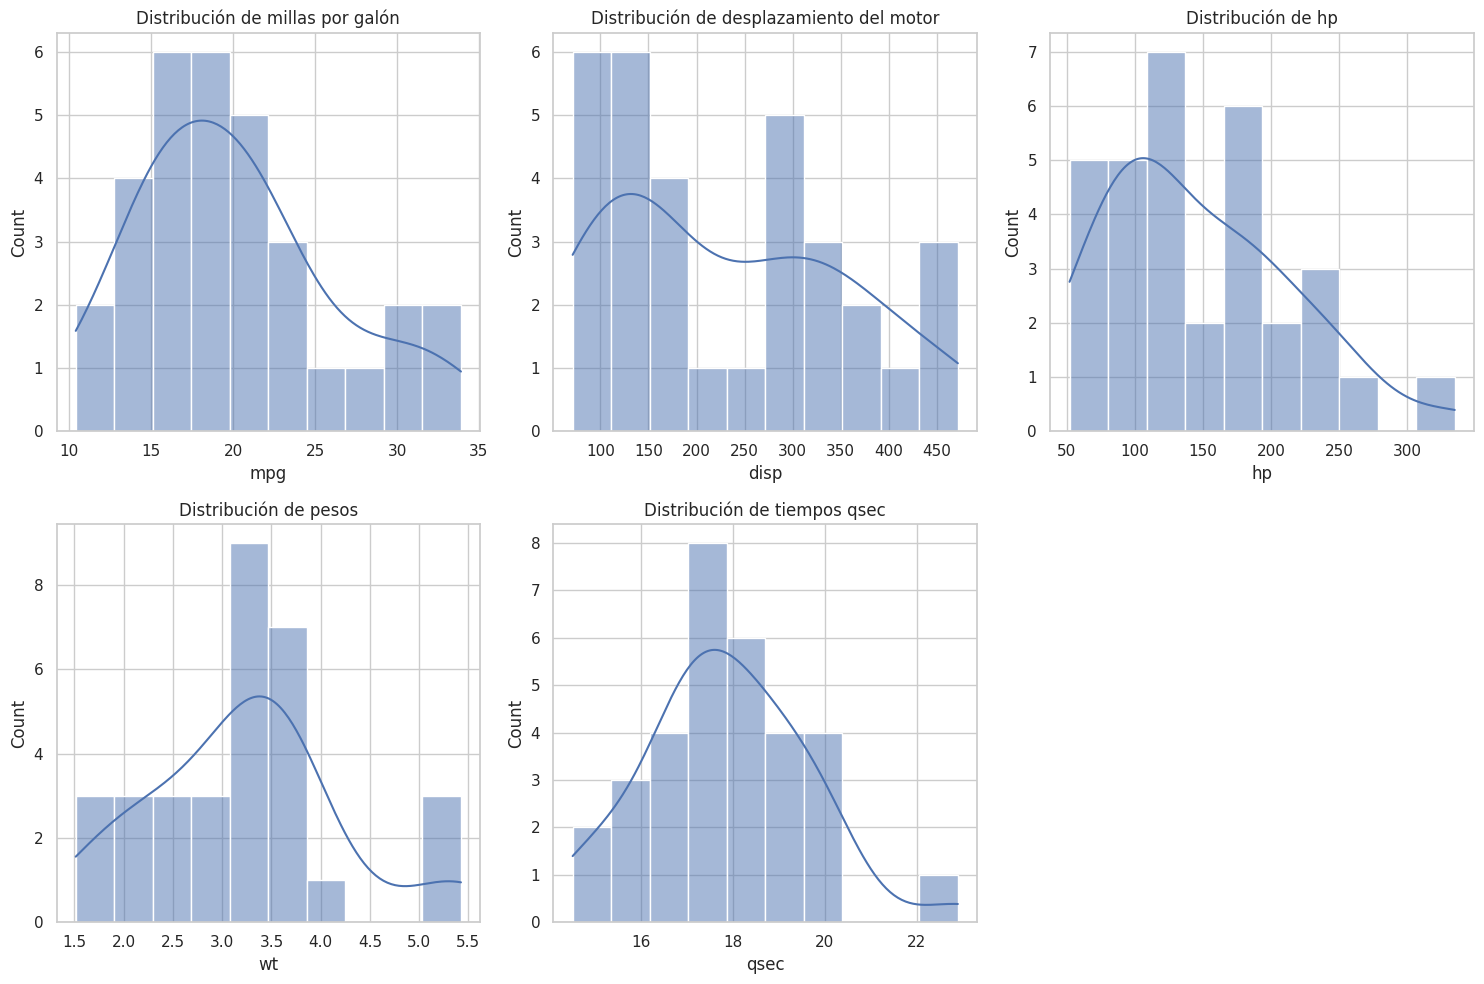

In [ ]:
#Configuramos el estilo de los gráficos
sns.set(style="whitegrid")

#Creación de 6 subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

#Histogramas
sns.histplot(data=df_cars, x='mpg', bins=10, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribución de millas por galón')

sns.histplot(data=df_cars, x='disp', bins=10, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribución de desplazamiento del motor')

sns.histplot(data=df_cars, x='hp', bins=10, kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Distribución de hp')

sns.histplot(data=df_cars, x='wt', bins=10, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribución de pesos')

sns.histplot(data=df_cars, x='qsec', bins=10, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribución de tiempos qsec')

#Eliminar el último subplot vacío
fig.delaxes(axes[1, 2])

#Ajustar y mostrar los gráficos
plt.tight_layout()
plt.show()

<table width='140%'>
<tr>
<td bgcolor='#FDD000'>

## **<font color="#00000">Modelos mas eficientes en consumo de combustible (alto mpg)</font>**

</td>
</tr>
</table>

In [ ]:
#Mostramos los 5 modelos más eficientes
mas_eficientes = df_cars.sort_values(by = 'mpg', ascending = False)[['model', 'mpg', 'hp']].head(5)
print(mas_eficientes)

             model   mpg   hp
19  Toyota Corolla  33.9   65
17        Fiat 128  32.4   66
27    Lotus Europa  30.4  113
18     Honda Civic  30.4   52
25       Fiat X1-9  27.3   66


<table width='140%'>
<tr>
<td bgcolor='#FDD000'>

## **<font color="#00000">Modelos con mayor rendimiento (mayor HP)</font>**

</td>
</tr>
</table>

In [ ]:
#Mostramos los 5 modelos con mejor rendimiento
mejor_rendimiento = df_cars.sort_values(by = 'hp', ascending = False)[['model', 'hp', 'mpg']].head(5)
print(mejor_rendimiento)

                model   hp   mpg
30      Maserati Bora  335  15.0
28     Ford Pantera L  264  15.8
6          Duster 360  245  14.3
23         Camaro Z28  245  13.3
16  Chrysler Imperial  230  14.7


<table width='140%'>
<tr>
<td bgcolor='#FDD000'>

## **<font color="#00000">Cantidad de autos por el tipo de transmisión</font>**

</td>
</tr>
</table>

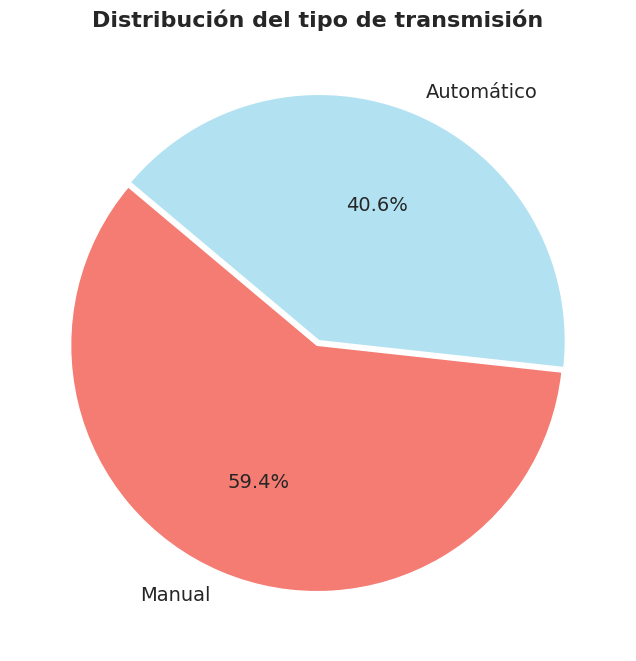

In [ ]:
#Número de autos por el tipo de transmisión (am)/ 0: automático /1: manual
autos_transmision = df_cars['am'].value_counts()

#Gráfico circular
plt.figure(figsize=(8,8))
plt.title('Distribución del tipo de transmisión', fontweight ="bold", fontsize = 16)
plt.pie(autos_transmision,
        labels = ['Manual', 'Automático'],
        explode=[0.01,0.01],
        colors=["#f57c73","#b2e2f2"],
        autopct = '%1.1f%%',
        startangle = 140,
        textprops={'fontsize': 14, 'fontweight':"normal"})
plt.show()

<table width='140%'>
<tr>
<td bgcolor='#FDD000'>

## **<font color="#00000">Análisis de eficiencia de combustible</font>**

</td>
</tr>
</table>

>Para analizar la eficiencia de combustible, se calcularon estadísticas resumidas como la media (mean) y la desviación estándar (std) de mpg para las categorías número de cilindros (cyl) y numero de marchas (gear)

In [ ]:
#Estadísticas de mpg por número de cilindros (cyl)
mpg_stats_por_cyl = df_cars.groupby('cyl')['mpg'].describe()
print(mpg_stats_por_cyl)

#Estadísticas de mpg por número de marchas (gear)
mpg_stats_por_gear = df_cars.groupby('gear')['mpg'].describe()
print(mpg_stats_por_gear)

     count       mean       std   min    25%   50%    75%   max
cyl                                                            
4     11.0  26.663636  4.509828  21.4  22.80  26.0  30.40  33.9
6      7.0  19.742857  1.453567  17.8  18.65  19.7  21.00  21.4
8     14.0  15.100000  2.560048  10.4  14.40  15.2  16.25  19.2
      count       mean       std   min   25%   50%     75%   max
gear                                                            
3      15.0  16.106667  3.371618  10.4  14.5  15.5  18.400  21.5
4      12.0  24.533333  5.276764  17.8  21.0  22.8  28.075  33.9
5       5.0  21.380000  6.658979  15.0  15.8  19.7  26.000  30.4


<table width='140%'>
<tr>
<td bgcolor='#FDD000'>

## **<font color="#00000">Relación entre el desplazamiento del motor (disp) y mpg</font>**

</td>
</tr>
</table>

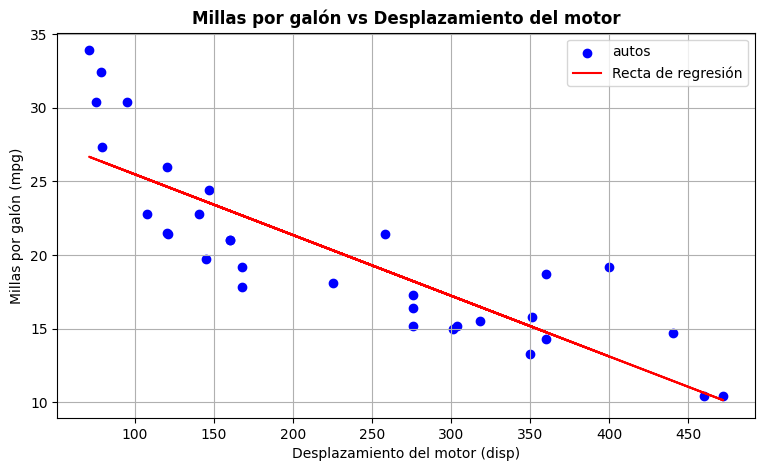

In [ ]:
#Importamos la función linregress de la biblioteca scipy.stats para calcular la regresión lineal
from scipy.stats import linregress

#Cálculo de la regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(df_cars['disp'], df_cars['mpg'])

#Creación de una figrua de tamaño 9x5 pulgadas
plt.figure(figsize=(9, 5))

#Creación del gráfico de dispersión (Etiqueta: 'autos')
plt.scatter(df_cars['disp'],df_cars['mpg'], color = 'b', label = 'autos')

#Creación de la recta de mejor ajuste (y = b + mx)
plt.plot(df_cars['disp'], intercept + slope*df_cars['disp'], color = 'red', label = 'Recta de regresión')

#Etiquetamos los ejes y el título
plt.xlabel('Desplazamiento del motor (disp)')
plt.ylabel('Millas por galón (mpg)')
plt.title('Millas por galón vs Desplazamiento del motor', fontweight ="bold")

#Mostramos la leyenda para el gráfico
plt.legend()

#Mostramos el gráfico incluyendo una cuadrícula
plt.grid(True)
plt.show()


<table width='140%'>
<tr>
<td bgcolor='#FDD000'>

## **<font color="#00000">Rendimiento vs eficiencia</font>**

</td>
</tr>
</table>

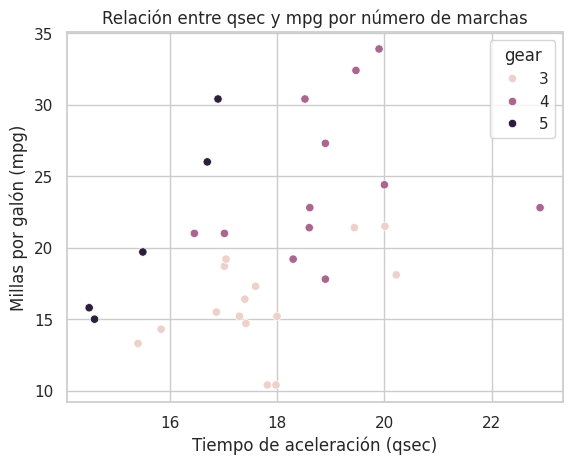

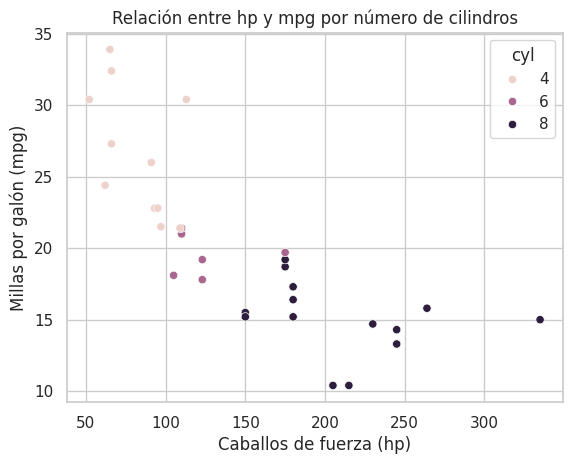

In [ ]:
# Relación entre qsec y mpg
sns.scatterplot(data=df_cars, x='qsec', y='mpg', hue='gear')
plt.title('Relación entre qsec y mpg por número de marchas')
plt.xlabel('Tiempo de aceleración (qsec)')
plt.ylabel('Millas por galón (mpg)')
plt.show()

# Relación entre hp y mpg
sns.scatterplot(data=df_cars, x='hp', y='mpg', hue='cyl')
plt.title('Relación entre hp y mpg por número de cilindros')
plt.xlabel('Caballos de fuerza (hp)')
plt.ylabel('Millas por galón (mpg)')
plt.show()